**import the package file**

In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [85]:
df = pd.read_csv('loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Separate the categorical and numerical columns

In [87]:
num_columns = df.select_dtypes(exclude = "object").columns
num_columns = list(num_columns)

In [88]:
cate_columns = df.select_dtypes(include="object").columns
cate_columns = list(cate_columns)

**numerical  columns = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']**

**categorical columns = [Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status]**

***total number of columns are 13 where***

***5 numerical columns and 8 categorical columns***

In [89]:
num_columns, cate_columns

(['ApplicantIncome',
  'CoapplicantIncome',
  'LoanAmount',
  'Loan_Amount_Term',
  'Credit_History'],
 ['Loan_ID',
  'Gender',
  'Married',
  'Dependents',
  'Education',
  'Self_Employed',
  'Property_Area',
  'Loan_Status'])

## missing values inputation (categorical column)

In [90]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

**Here columns = ['Gender', 'Depenedents','Married', 'self_employed','LoanAmount','Loan_Amount_Term', 'Credit History'] contains the missing values**

**total 614 rows and 13 columns**

In [91]:
df.shape

(614, 13)

In [92]:
# df_clean = df.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [93]:
for col in cate_columns:
    fill_value = df[col].mode()[0]
    df[col] = df[col].fillna(fill_value)

In [94]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Target Variable

- here target variable is Loan_status
- it is categorical variable, now find out its frequency table, percentage, distribution and barplot

**frequency table of a Loan_status**

In [95]:
Loan_frequency_table = df['Loan_Status'].value_counts()
Loan_frequency_table

Loan_Status
Y    422
N    192
Name: count, dtype: int64

**create frequency table of Loan Status**

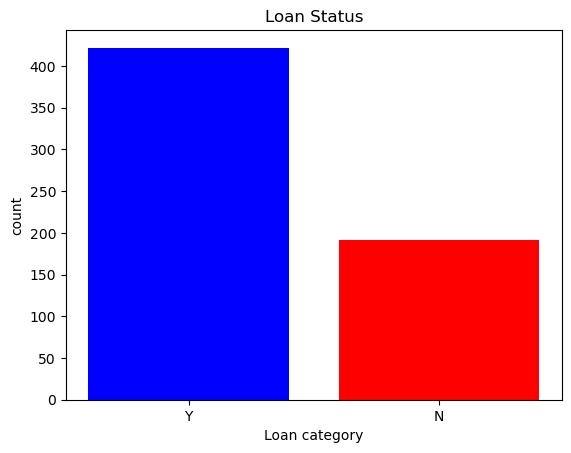

In [96]:
plt.bar(Loan_frequency_table.index, Loan_frequency_table.values, color =['blue','red'] )
plt.title("Loan Status")
plt.xlabel("Loan category")
plt.ylabel("count")
plt.show()

**normalize the Loan_Status columns to find the percentage**

In [97]:
loan_percentage = df['Loan_Status'].value_counts(normalize = True)*100
loan_percentage

Loan_Status
Y    68.729642
N    31.270358
Name: proportion, dtype: float64

**Gender Variable Analysis**

In [98]:
Gender_values = df.value_counts('Gender').reset_index()
Gender_values

,Gender,count
0,Male,502
1,Female,112


<BarContainer object of 2 artists>

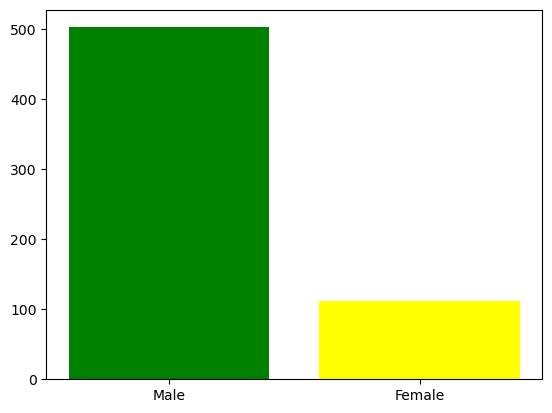

In [99]:
plt.bar('Gender','count', data = Gender_values, color = ['Green','Yellow'])

Text(0.5, 1.0, 'Gender')

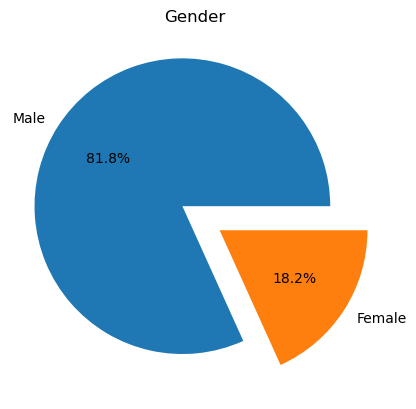

In [100]:
Gender_value = df.value_counts('Gender', normalize= True)
plt.pie( Gender_value.values,labels = Gender_value.index, autopct='%1.1f%%',explode = [0.1,0.2] )
plt.title("Gender")

**Married variable Analysis**

In [101]:
married_value = df.value_counts('Married').reset_index()
married_value

,Married,count
0,Yes,401
1,No,213


<BarContainer object of 2 artists>

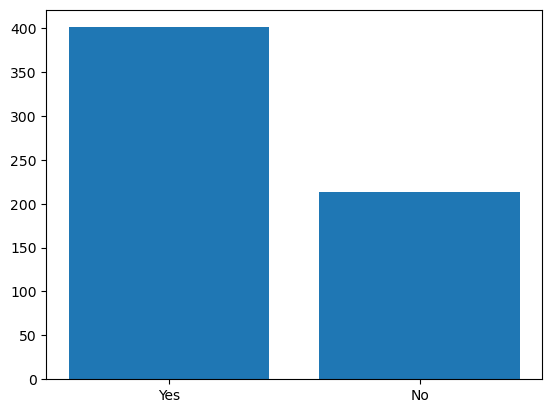

In [102]:
plt.bar('Married', 'count', data = married_value)

Text(0.5, 1.0, 'Married')

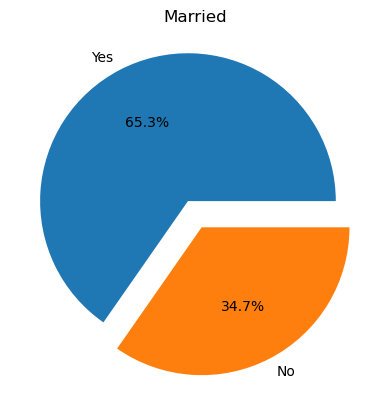

In [103]:
married_value = df.value_counts('Married', normalize= True)
plt.pie( married_value.values,labels = married_value.index, autopct='%1.1f%%',explode = [0.1,0.1] )
plt.title("Married")

**Analysis on "Self employed"**

<BarContainer object of 2 artists>

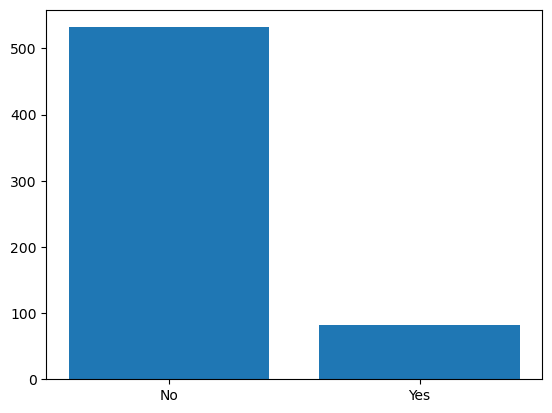

In [104]:
self_employed_values = df.value_counts('Self_Employed').reset_index()
plt.bar("Self_Employed","count", data = self_employed_values)

**Analysis on Credit History**

In [105]:
credit_history_values = df.value_counts('Credit_History').reset_index()
credit_history_values

,Credit_History,count
0,1.0,475
1,0.0,89


<BarContainer object of 2 artists>

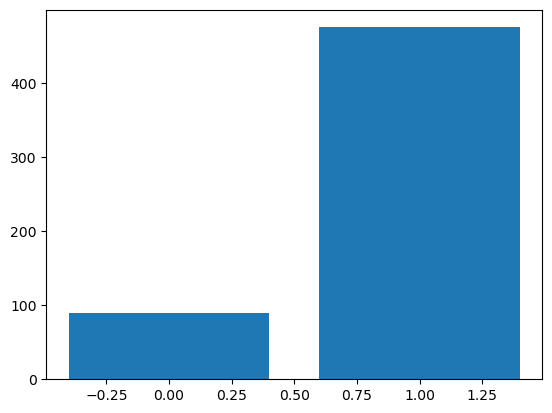

In [106]:
plt.bar("Credit_History","count", data = credit_history_values)

**Anayslis on Dependent variable**

In [107]:
dependent_variable_values = df.value_counts('Dependents').reset_index()
dependent_variable_values

,Dependents,count
0,0,360
1,1,102
2,2,101
3,3+,51


<BarContainer object of 4 artists>

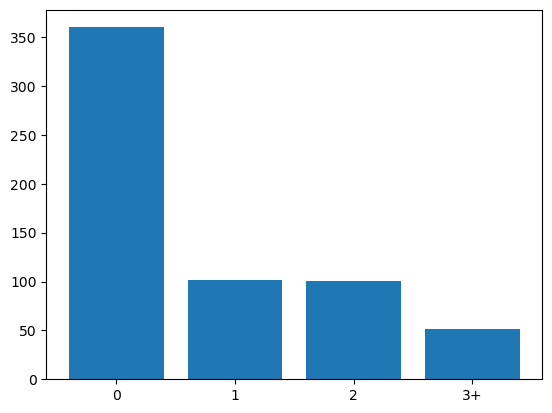

In [108]:
plt.bar('Dependents','count', data= dependent_variable_values)

**Analysis on Education variables**

In [109]:
education_values = df.value_counts('Education').reset_index()
education_values

,Education,count
0,Graduate,480
1,Not Graduate,134


<BarContainer object of 2 artists>

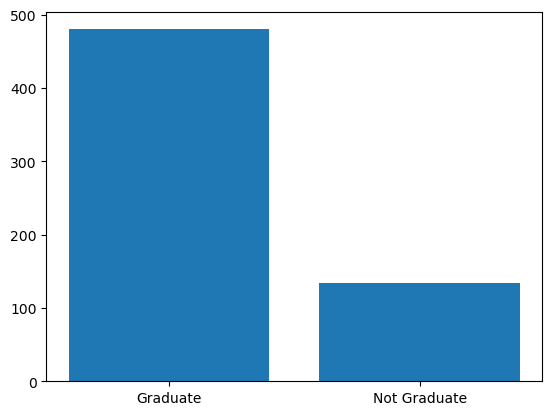

In [110]:
plt.bar("Education","count", data= education_values)

In [111]:
property_area_values = df.value_counts('Property_Area').reset_index()
property_area_values

,Property_Area,count
0,Semiurban,233
1,Urban,202
2,Rural,179


<BarContainer object of 3 artists>

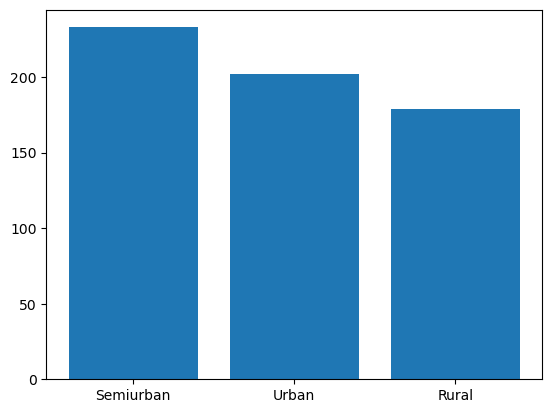

In [112]:
plt.bar('Property_Area','count', data = property_area_values)

**ApplicantIncome distribution**

C:\Users\panka\AppData\Local\Temp\ipykernel_20004\2355282001.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ApplicantIncome'] )


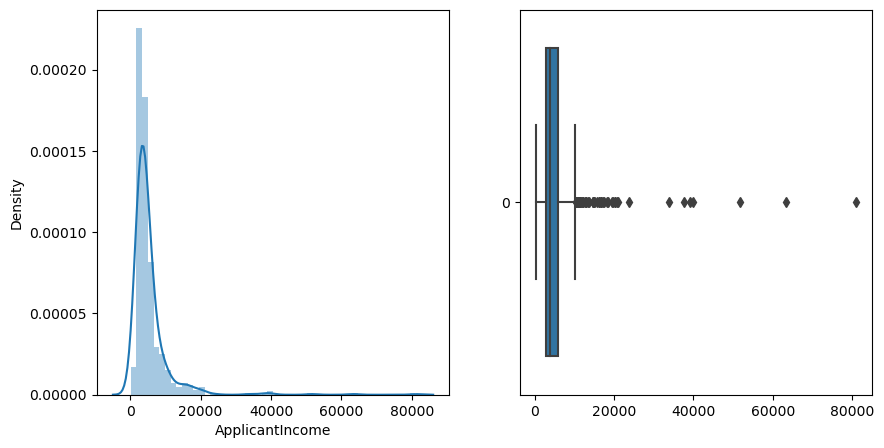

In [113]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
sns.distplot(df['ApplicantIncome'] )
plt.subplot(1,2,2)
sns.boxplot(df['ApplicantIncome'], orient= 'h')
plt.show()


In [114]:
# find th outliers
def outliers(data):
    global upper_bound, lower_bound
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    return outliers
data = df['ApplicantIncome']
outliers = outliers(data)
print("No of outliers in ApplicantIncome", len(outliers))
print("Outliers are", outliers)

No of outliers in ApplicantIncome 50
Outliers are [12841, 12500, 11500, 10750, 13650, 11417, 14583, 10408, 23803, 10513, 20166, 14999, 11757, 14866, 39999, 51763, 33846, 39147, 12000, 11000, 16250, 14683, 11146, 14583, 20667, 20233, 15000, 63337, 19730, 15759, 81000, 14880, 12876, 10416, 37719, 16692, 16525, 16667, 10833, 18333, 17263, 20833, 13262, 17500, 11250, 18165, 19484, 16666, 16120, 12000]


**cap with lower and upper bond**

C:\Users\panka\AppData\Local\Temp\ipykernel_20004\3641243584.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_cap['ApplicantIncome'] )


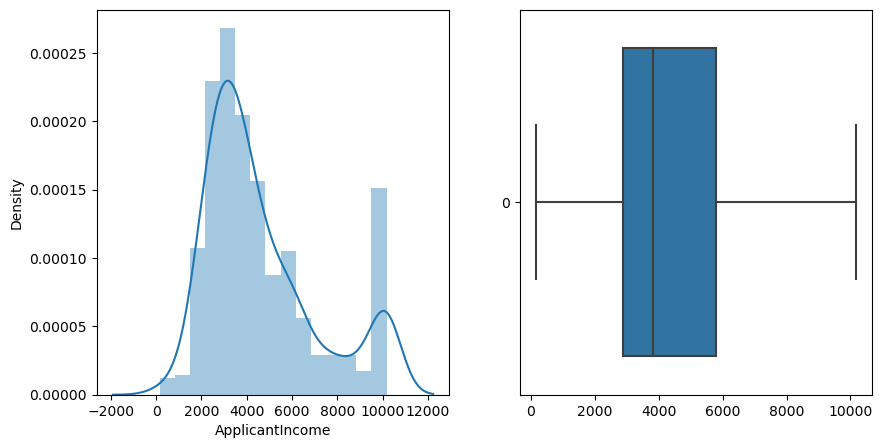

In [115]:
new_df_cap = df.copy()
new_df_cap['ApplicantIncome'] = np.where(new_df_cap['ApplicantIncome'] > upper_bound,upper_bound, new_df_cap['ApplicantIncome'])
new_df_cap['ApplicantIncome'] = np.where(new_df_cap['ApplicantIncome'] < lower_bound, lower_bound, new_df_cap['ApplicantIncome'])
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
sns.distplot(new_df_cap['ApplicantIncome'] )
plt.subplot(1,2,2)
sns.boxplot(new_df_cap['ApplicantIncome'], orient= 'h')
plt.show()


**Analysis on CoapplicantIncome distribution**

C:\Users\panka\AppData\Local\Temp\ipykernel_20004\847558017.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CoapplicantIncome'] )


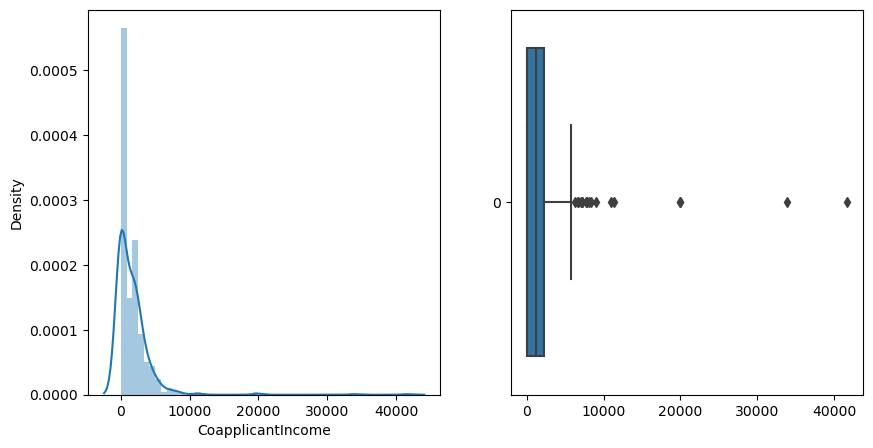

In [116]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
sns.distplot(df['CoapplicantIncome'] )
plt.subplot(1,2,2)
sns.boxplot(df['CoapplicantIncome'], orient='h')
plt.show()

In [117]:
# find the outliers
def outliers(data):
    global lower_bound_co, upper_bound_co
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound_co = q1 - 1.5 * iqr
    upper_bound_co = q3 + 1.5 * iqr
    outliers = [x for x in data if x < lower_bound_co or x > upper_bound_co]
    return outliers
data = df['CoapplicantIncome']
outliers = outliers(data)
print("No of outliers in CoapplicantIncome", len(outliers))
print("Outliers are ", outliers)

No of outliers in CoapplicantIncome 18
Outliers are  [10968.0, 8106.0, 7210.0, 8980.0, 7750.0, 11300.0, 7250.0, 7101.0, 6250.0, 7873.0, 20000.0, 20000.0, 8333.0, 6667.0, 6666.0, 7166.0, 33837.0, 41667.0]


C:\Users\panka\AppData\Local\Temp\ipykernel_20004\2627637055.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_cap['CoapplicantIncome'] )


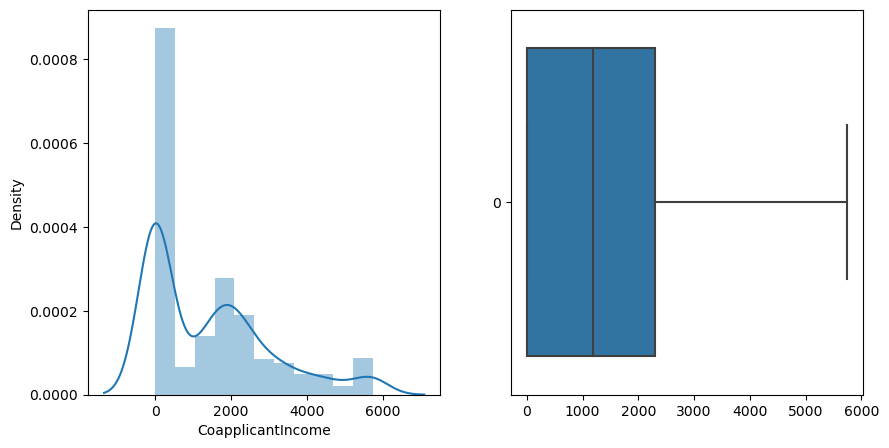

In [118]:
new_df_cap = df.copy()
new_df_cap['CoapplicantIncome'] = np.where(new_df_cap['CoapplicantIncome'] > upper_bound_co,upper_bound_co, new_df_cap['CoapplicantIncome'])
new_df_cap['CoapplicantIncome'] = np.where(new_df_cap['CoapplicantIncome'] < lower_bound_co, lower_bound_co, new_df_cap['CoapplicantIncome'])
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
sns.distplot(new_df_cap['CoapplicantIncome'] )
plt.subplot(1,2,2)
sns.boxplot(new_df_cap['CoapplicantIncome'], orient= 'h')
plt.show()

**Analysis on Loan Amount**

C:\Users\panka\AppData\Local\Temp\ipykernel_20004\2683793356.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['LoanAmount'] )


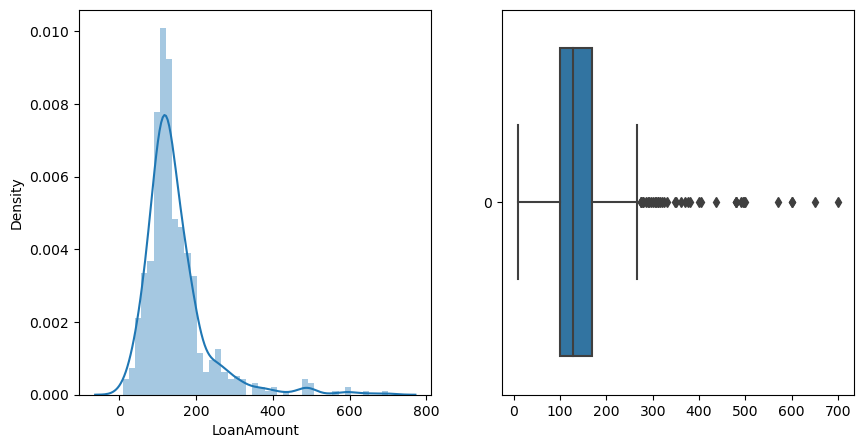

In [119]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
sns.distplot(df['LoanAmount'] )
plt.subplot(1,2,2)
sns.boxplot(df['LoanAmount'], orient= 'h')
plt.show()

In [120]:
# find number of outliers
def outliers(data):
    global lower_bound_amount, upper_bound_amount
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound_amount = q1 - 1.5 * iqr
    upper_bound_amount = q3 + 1.5 * iqr
    outliers = [x for x in data if x < lower_bound_amount or x > upper_bound_amount]
    return outliers
data = df['LoanAmount'] 
outliers = outliers(data)
print("Number of outliers in LoanAmount :", len(outliers))
print("Outliers:", outliers)


Number of outliers in LoanAmount : 0
Outliers: []


<Axes: >

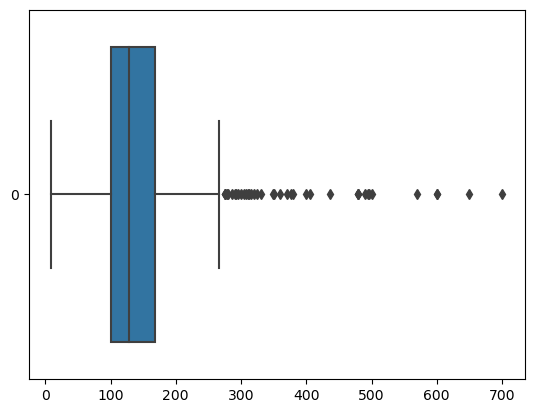

In [121]:
new_data = df.copy()
new_data["LoanAmount"] = np.where(new_data['LoanAmount']>upper_bound_amount, new_data['LoanAmount'].median(), new_data['LoanAmount'])
new_data["LoanAmount"] = np.where(new_data['LoanAmount']<lower_bound_amount, new_data['LoanAmount'].median(), new_data['LoanAmount'])
sns.boxplot(new_data['LoanAmount'], orient= 'h')

**Analysis on LoanAmountTerm**

C:\Users\panka\AppData\Local\Temp\ipykernel_20004\2987360617.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Loan_Amount_Term'] )


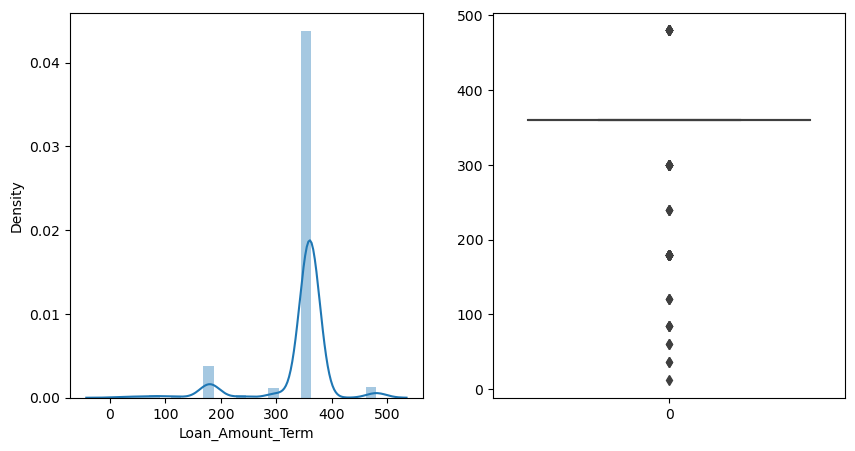

In [122]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
sns.distplot(df['Loan_Amount_Term'] )
plt.subplot(1,2,2)
sns.boxplot(df['Loan_Amount_Term'])
plt.show()

In [123]:
def outliers(data):
    global lower_bound_amount_term, upper_bound_amount_term
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound_amount_term = q1 - 1.5 * iqr
    upper_bound_amount_term = q3 + 1.5 * iqr
    outliers = [x for x in data if x < lower_bound_amount_term or x > upper_bound_amount_term]
    return outliers
data = df['Loan_Amount_Term'] 
outliers = outliers(data)
print("upper_bound", upper_bound_amount_term)
print("lower_bound", lower_bound_amount_term)
print("Number of outliers in LoanAmount term :", len(outliers))
print("Outliers:", outliers)



upper_bound nan
lower_bound nan
Number of outliers in LoanAmount term : 0
Outliers: []


<Axes: >

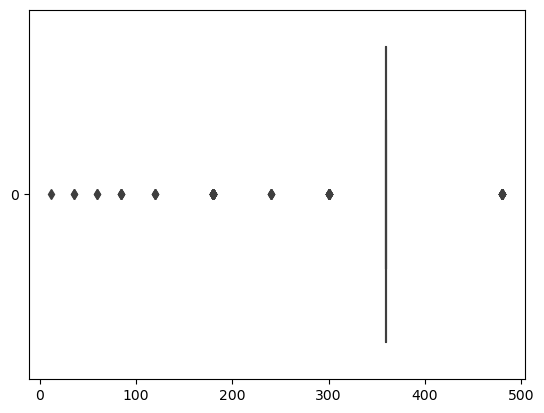

In [124]:
new_data = df.copy()
new_df_cap['Loan_Amount_Term'] = np.where(new_df_cap['Loan_Amount_Term'] > upper_bound_amount_term,upper_bound_amount_term, new_df_cap['Loan_Amount_Term'])
new_df_cap['Loan_Amount_Term'] = np.where(new_df_cap['Loan_Amount_Term'] < lower_bound_amount_term, lower_bound_amount_term, new_df_cap['Loan_Amount_Term'])
sns.boxplot(new_data['Loan_Amount_Term'], orient= 'h')

**Missing value imputation (Numerical Columns)**

In [125]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

**Filling the Loan_Amount_Term**

In [126]:
df['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

From the above observation of Loan Amount Term variable the value of 360 is repeating the most, so we can replace the missing values with mode of this variable

In [127]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace = True)

In [128]:
df['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

**Filling the Loan Amount by mean or median**

In [129]:
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace = True)

In [130]:
df.value_counts('Credit_History').reset_index()

,Credit_History,count
0,1.0,475
1,0.0,89


In [131]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace = True)


In [132]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Bivariate Analysis

In [133]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Categorical Independent Variable vs Target Variabe

***Relation between "Loan_status" and "Gender"***

In [134]:
gender = pd.crosstab(df['Gender'], df['Loan_Status'])
gender

Loan_Status,N,Y
Gender,,
Female,37,75
Male,155,347


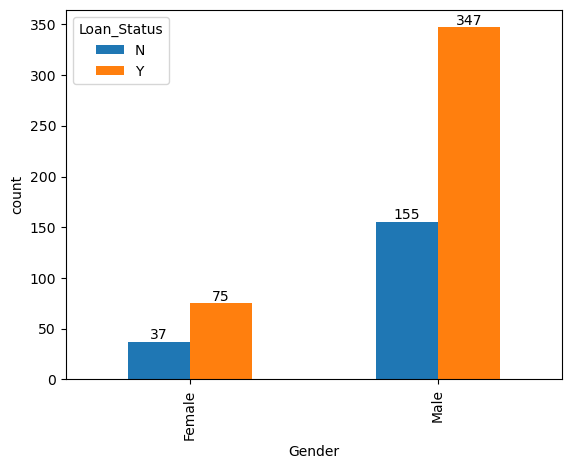

In [135]:
ax = gender.plot(kind = 'bar')
plt.xlabel("Gender")
plt.ylabel("count")
for container in ax.containers:
    ax.bar_label(container)

**Relation between Loan Status and Married**

Loan_Status    N    Y
Married              
No            79  134
Yes          113  288


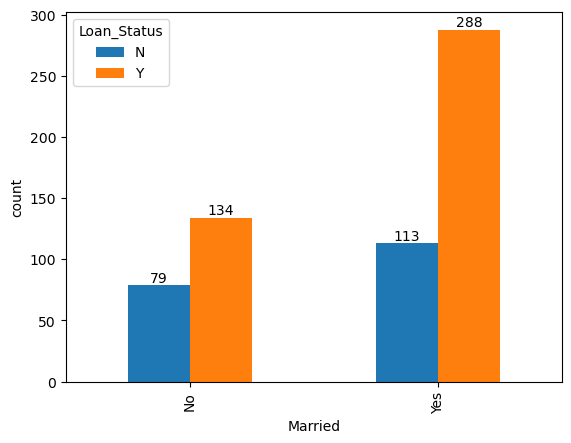

In [136]:
Married = pd.crosstab(df['Married'], df['Loan_Status'])
print(Married)
ax = Married.plot(kind = 'bar')
plt.xlabel("Married")
plt.ylabel("count")
for container in ax.containers:
    ax.bar_label(container)

**Relation between Loan Status and dependend**

Loan_Status    N    Y
Dependents           
0            113  247
1             36   66
2             25   76
3+            18   33


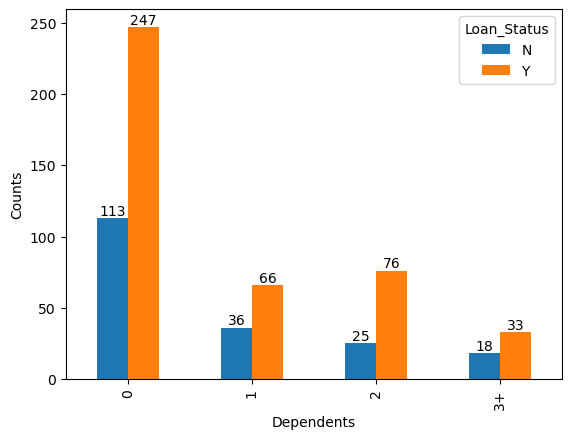

In [137]:
Dependents = pd.crosstab(df['Dependents'], df['Loan_Status'])
print(Dependents)
ax = Dependents.plot(kind = 'bar')
plt.xlabel("Dependents")
plt.ylabel("Counts")
for container in ax.containers:
    ax.bar_label(container)

**Relation Between Loan_status and Education**

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


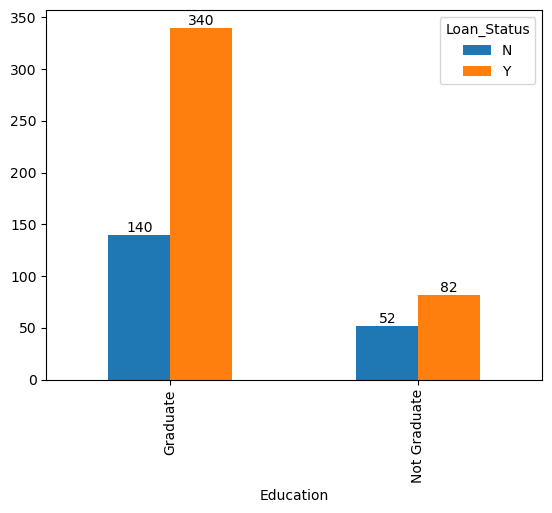

In [138]:
Education = pd.crosstab(df['Education'], df['Loan_Status'])
print(Education)
ax = Education.plot(kind = 'bar')
for container in ax.containers:
    ax.bar_label(container)


**Relation between Loan status and self employed**

Loan_Status      N    Y
Self_Employed          
No             166  366
Yes             26   56


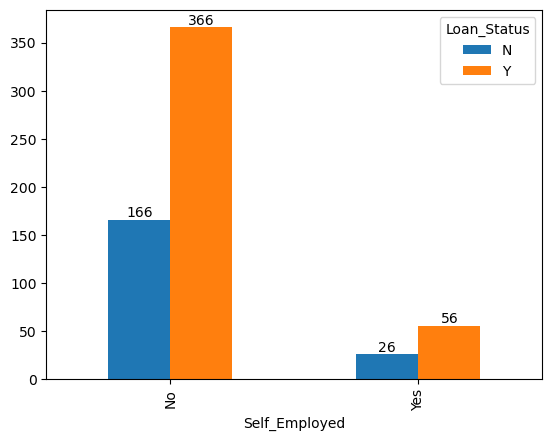

In [139]:
SelfEmployed = pd.crosstab(df['Self_Employed'], df['Loan_Status'])
print(SelfEmployed)
ax = SelfEmployed.plot(kind = "bar")
for container in ax.containers:
    ax.bar_label(container)

**Relation Between Loan Status and Credit History**

Loan_Status       N    Y
Credit_History          
0.0              82    7
1.0             110  415


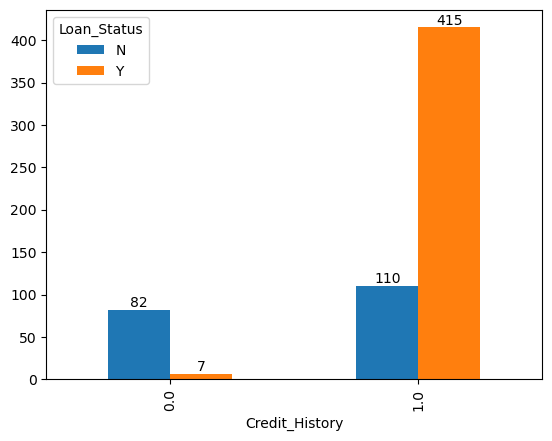

In [140]:
CreditHistory = pd.crosstab(df['Credit_History'], df['Loan_Status'])
print(CreditHistory)
ax = CreditHistory.plot(kind = 'bar')
for container in ax.containers:
    ax.bar_label(container)

**Relation Between Loan Status and Property Area**

Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133


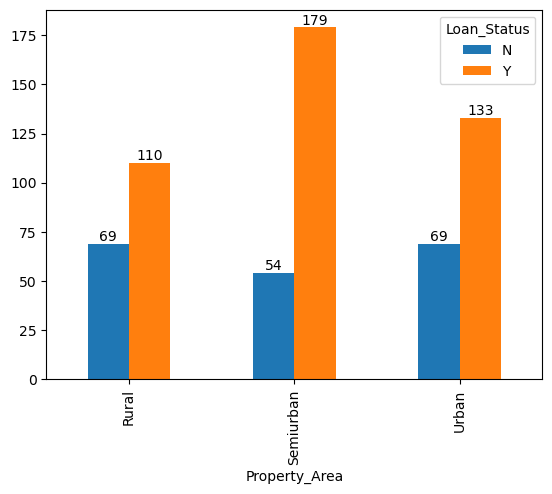

In [141]:
PropertyArea = pd.crosstab(df['Property_Area'], df['Loan_Status'])
print(PropertyArea)
ax = PropertyArea.plot(kind = "bar")
for container in ax.containers:
    ax.bar_label(container)


## Conversion of Categorical variable to numerical data


***Dependents columns into numerical***


In [142]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Dependents'] = le.fit_transform(df['Dependents'])
df.Dependents.unique()

array([0, 1, 2, 3])

In [143]:
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])
df.Loan_Status.dtypes

dtype('int32')

## Correlation between the Numerical Columns

In [144]:
corr = df.corr(numeric_only=True)
corr

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
Dependents,1.000000,0.118202,0.030430,0.163103,-0.103864,-0.040160,0.010118
ApplicantIncome,0.118202,1.000000,-0.116605,0.565181,-0.046531,-0.018615,-0.004710
CoapplicantIncome,0.030430,-0.116605,1.000000,0.189218,-0.059383,0.011134,-0.059187
LoanAmount,0.163103,0.565181,0.189218,1.000000,0.036960,-0.000607,-0.033214
Loan_Amount_Term,-0.103864,-0.046531,-0.059383,0.036960,1.000000,-0.004705,-0.022549
Credit_History,-0.040160,-0.018615,0.011134,-0.000607,-0.004705,1.000000,0.540556
Loan_Status,0.010118,-0.004710,-0.059187,-0.033214,-0.022549,0.540556,1.000000


<Axes: >

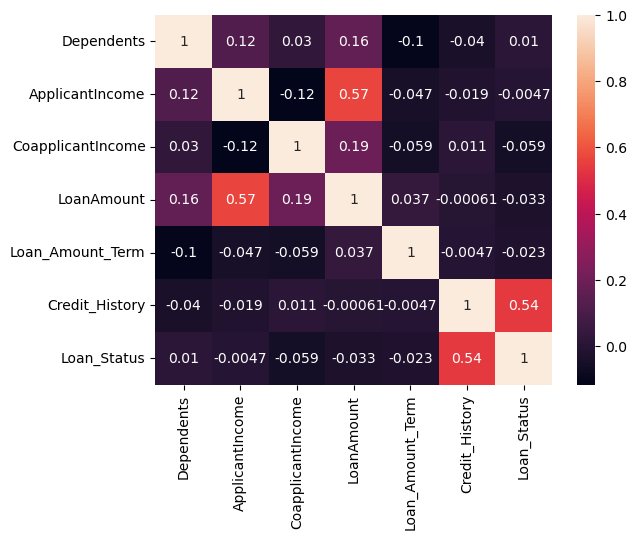

In [145]:
sns.heatmap(corr, annot=True)

We see that the most correlated variables are (ApplicantIncome - LoanAmount) and (Credit_History - Loan_Status).

## standardization of columns

**converted to numerical columns to the to the standardized data**

In [151]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
for i in num_columns:
    df[i] = ss.fit_transform(df[[i]])

In [152]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,0.072991,-0.554487,-0.211241,0.273231,0.411733,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,-0.134412,-0.038732,-0.211241,0.273231,0.411733,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,-0.393747,-0.554487,-0.948996,0.273231,0.411733,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,-0.462062,0.251980,-0.306435,0.273231,0.411733,Urban,1
4,LP001008,Male,No,0,Graduate,No,0.097728,-0.554487,-0.056551,0.273231,0.411733,Urban,1
